In [15]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the `tesla_data` dataframe using the `head()` function.


In [17]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period = "max")
tesla_data.reset_index(inplace = True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the `tesla_revenue` dataframe using the `tail()` function.


In [18]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)

data = []
for table in soup.find_all("table"):
    if any(["Tesla Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text
            })
tesla_revenue = pd.DataFrame(data)

In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [20]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,$31
49,2010-06-30,$28
50,2010-03-31,$21
52,2009-09-30,$46
53,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the `gme_data` dataframe using the `head()` function.


In [21]:
gme = yf.Ticker("GME")
gme_data = gme.history(period = "max")
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674835,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the `gme_revenue` dataframe using the `tail()` function.


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data)

data = []
for table in soup.find_all("table"):
    if any(["GameStop Quarterly Revenue".lower() in th.text.lower() for th in table.find_all("th")]):
        for row in table.find("tbody").find_all("tr"):
            date_col, rev_col = [col for col in row.find_all("td")]
            data.append({
                "Date": date_col.text,
                "Revenue": rev_col.text.replace("$", " ").replace(",", "")
            })
gme_revenue = pd.DataFrame(data)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph.


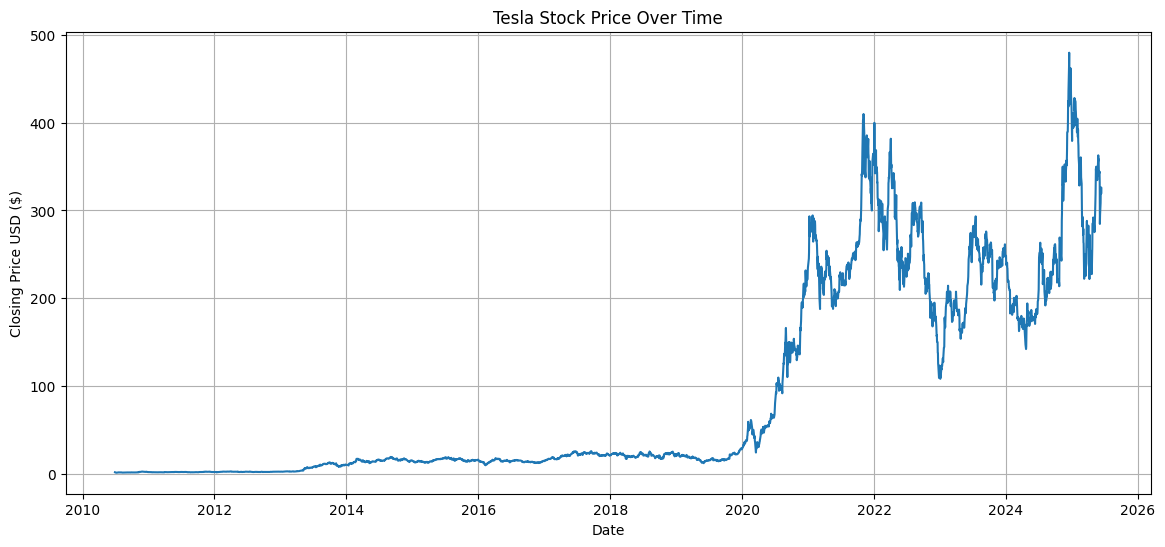

In [24]:
import matplotlib.pyplot as plt

def make_graph(data, stock, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD ($)')
    plt.grid(True)
    plt.show()
make_graph(tesla_data, 'TSLA', 'Tesla Stock Price Over Time')

## Question 6: Plot GameStop Stock Graph

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph.


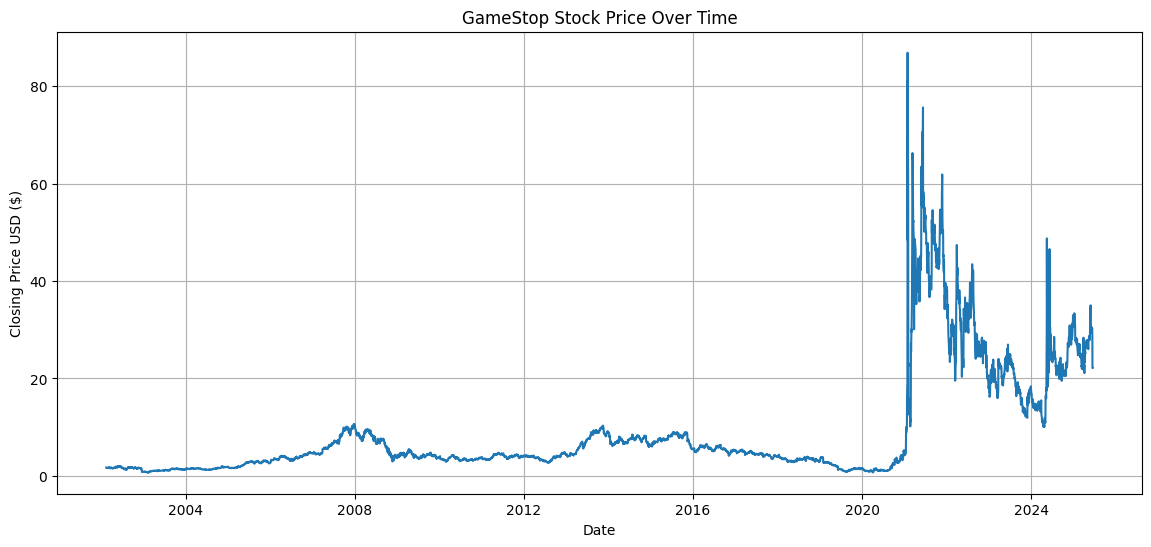

In [26]:
make_graph(gme_data, 'GME', 'GameStop Stock Price Over Time')